# [적금(자유/정액) 상품 분석]

In [1]:
# 나눔 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,650 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

- 모듈 로드

In [1]:
import os
import sys
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import re

import warnings

plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지

%matplotlib inline

- 데이터 로드

In [2]:
dp6_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/상품데이터/상품데이터_크롤링/적금/installment_saving_6.csv',encoding = 'utf-8')
dp12_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/상품데이터/상품데이터_크롤링/적금/installment_saving_12.csv',encoding = 'utf-8')
dp24_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/상품데이터/상품데이터_크롤링/적금/installment_saving_24.csv',encoding = 'utf-8')
dp36_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/상품데이터/상품데이터_크롤링/적금/installment_saving_36.csv',encoding = 'utf-8')

In [3]:
df_concat = pd.concat([dp6_df, dp12_df, dp24_df, dp36_df]).reset_index(drop = True)

- 데이터 확인

In [4]:
dp6_df.head(2)

,금융회사,상품명,적립방식,세전이자율,세후이자율,세후이자(예시),최고우대금리,가입대상,이자계산방식,기간,비교 공시일,담당부서 및 연락처,우대조건,가입대상.1,가입방법,만기후 이자율,기타유의사항
0,경남은행,BNK 위더스(With-us)자유적금,정액적립식,-,-,-,6.25%,제한없음,단리,6개월,2023-10-23,"리테일금융부(대출문의),055-290-8743 마케팅추진부(예·적금상품),1600-...",①ESG 실천 우대금리 1.50% - 영업점 가입 및 증빙서류 지참 한하여 적용 (...,개인 및 개인사업자,"영업점,인터넷",만기후 1개월 이내: 일반정기예금 기본이율의 50%\n만기후 1개월 초과: 일반정기...,1.계약기간은 1개월 이상 36개월 이내 월단위\n2.1인 1계좌\n3.매월 최소 ...
1,페퍼저축은행,AI Peppers 배구사랑 정기적금,정액적립식,6.00%,5.08%,"8,883",6.00%,제한없음,단리,6개월,2023-01-16,예금담당자 03180159344 대출문의 15990722,우대사항 없음,개인고객(당행 입출금 계좌 보유 고객 중 페퍼스타디움 방문 관람 시 제공된 쿠폰코드...,스마트폰,*신규가입일 당시 영업점 및 인터넷 홈페이지에 고시한 경과기간별 만기후이자율 적용\...,*최소가입금액: 1만원 이상\n*최고한도(단위:원) 50만원(정액 적립식)


In [5]:
dp12_df.head(2)

,금융회사,상품명,적립방식,세전이자율,세후이자율,세후이자(예시),최고우대금리,가입대상,이자계산방식,기간,비교 공시일,담당부서 및 연락처,우대조건,가입대상.1,가입방법,만기후 이자율,기타유의사항
0,경남은행,BNK 위더스(With-us)자유적금,정액적립식,-,-,-,6.55%,제한없음,단리,12개월,2023-10-23,"리테일금융부(대출문의),055-290-8743 마케팅추진부(예·적금상품),1600-...",①ESG 실천 우대금리 1.50% - 영업점 가입 및 증빙서류 지참 한하여 적용 (...,개인 및 개인사업자,"영업점,인터넷",만기후 1개월 이내: 일반정기예금 기본이율의 50%\n만기후 1개월 초과: 일반정기...,1.계약기간은 1개월 이상 36개월 이내 월단위\n2.1인 1계좌\n3.매월 최소 ...
1,오투저축은행,정기적금,정액적립식,5.00%,4.23%,"27,854",5.00%,일부제한,복리,12개월,2023-03-30,수신팀 (042-712-0260),-,- 신규계약(1인1계좌) - 영업점 가입가능 - 1만원~30만원까지,영업점,1. 2019년 7월 1일 이전 신규\n-보통예금 이율\n\n2. 2019년 7월 ...,중도해지\n* 2019년 7월 1일 이전 신규 -12개월 미만: 해지일의 보통예금 ...


In [6]:
dp24_df.head(2)

,금융회사,상품명,적립방식,세전이자율,세후이자율,세후이자(예시),최고우대금리,가입대상,이자계산방식,기간,비교 공시일,담당부서 및 연락처,우대조건,가입대상.1,가입방법,만기후 이자율,기타유의사항
0,경남은행,BNK 위더스(With-us)자유적금,정액적립식,-,-,-,6.65%,제한없음,단리,24개월,2023-10-23,"리테일금융부(대출문의),055-290-8743 마케팅추진부(예·적금상품),1600-...",①ESG 실천 우대금리 1.50% - 영업점 가입 및 증빙서류 지참 한하여 적용 (...,개인 및 개인사업자,"영업점,인터넷",만기후 1개월 이내: 일반정기예금 기본이율의 50%\n만기후 1개월 초과: 일반정기...,1.계약기간은 1개월 이상 36개월 이내 월단위\n2.1인 1계좌\n3.매월 최소 ...
1,동양저축은행,정기적금,정액적립식,4.80%,4.06%,"101,520",4.80%,제한없음,단리,24개월,2023-03-28,"(기업금융팀 ,062-720-0866)",없음,제한없음,영업점,1개월내:가입 당시 이율과 만기시점 해당 계약기간 이율과 비교하여 낮은 금리 적용\...,없음


In [7]:
dp36_df.head(2)

,금융회사,상품명,적립방식,세전이자율,세후이자율,세후이자(예시),최고우대금리,가입대상,이자계산방식,기간,비교 공시일,담당부서 및 연락처,우대조건,가입대상.1,가입방법,만기후 이자율,기타유의사항
0,경남은행,BNK 위더스(With-us)자유적금,정액적립식,-,-,-,6.75%,제한없음,단리,36개월,2023-10-23,"리테일금융부(대출문의),055-290-8743 마케팅추진부(예·적금상품),1600-...",①ESG 실천 우대금리 1.50% - 영업점 가입 및 증빙서류 지참 한하여 적용 (...,개인 및 개인사업자,"영업점,인터넷",만기후 1개월 이내: 일반정기예금 기본이율의 50%\n만기후 1개월 초과: 일반정기...,1.계약기간은 1개월 이상 36개월 이내 월단위\n2.1인 1계좌\n3.매월 최소 ...
1,아산저축은행,꿈나무장학적금,정액적립식,5.00%,4.23%,"234,765",5.00%,제한없음,단리,36개월,2022-11-15,영업부0415379000,없음,1~19세,영업점,"1개월 내 : 가입시점, 만기시점 비교 낮은 단리이율 적용, 이후 보통예금 금리 적용",없음


# [1] 기간에 따른 예금 적금 갯수 확인

In [8]:
print(dp6_df.shape,dp12_df.shape,dp24_df.shape,dp36_df.shape )

(251, 17) (388, 17) (334, 17) (301, 17)


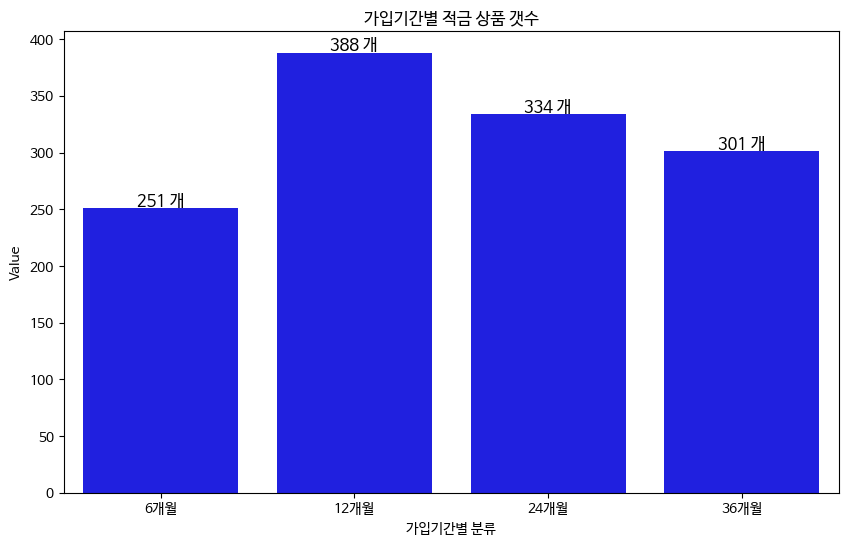

In [9]:
data = {
    'Category': ['6개월', '12개월', '24개월', '36개월'],
    'Value': [dp6_df.shape[0], dp12_df.shape[0], dp24_df.shape[0], dp36_df.shape[0]]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# Bar Plot 그리기
ax = sns.barplot(x='Category', y='Value', data=df, color='b', label='Category')

# 제목 설정
plt.title('가입기간별 적금 상품 갯수')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# x축 라벨 설정
plt.xlabel('가입기간별 분류')

# y축 라벨 설정
plt.ylabel('Value')

# 그래프 보여주기
plt.show()

# [2] 기간 별 평균 최고 우대금리, 기본 이자율

In [10]:
# 각 상품별 최고 우대 금리의 평균
def find_max_rate(df) :
    return np.mean(pd.to_numeric(df['최고우대금리'].str.rstrip('%'), errors='coerce'))

def find_basic_rate(df):
    # '-'를 최고우대금리로 대체
    df['세전이자율'] = np.where(df['세전이자율'] == '-', df['최고우대금리'], df['세전이자율'])

    df['세전이자율'] = df['세전이자율'].str.rstrip('%').astype(float)

    return np.mean(df['세전이자율'])

## [2-1] 기간 별 평균 최고 우대 금리

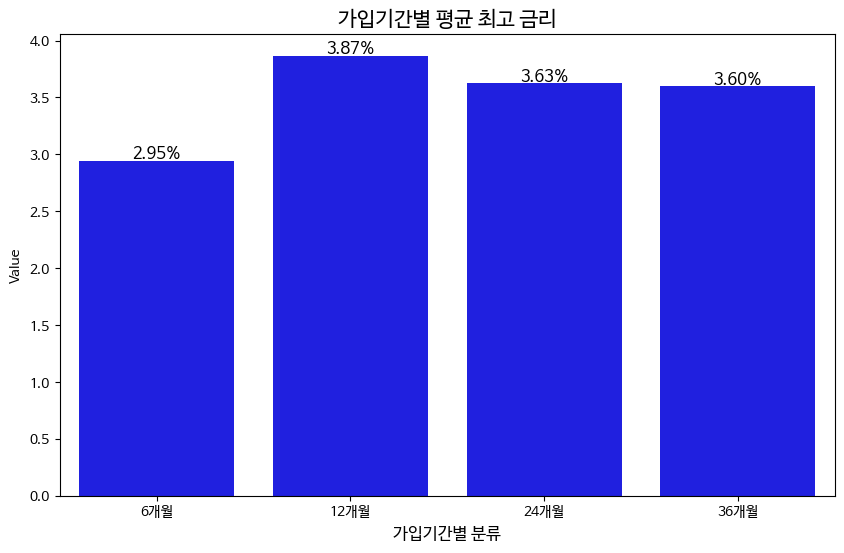

In [11]:
data = {
    'Category': ['6개월', '12개월', '24개월', '36개월'],
    'Value': [find_max_rate(dp6_df), find_max_rate(dp12_df), find_max_rate(dp24_df), find_max_rate(dp36_df)]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Category', y='Value', data=df, color='b', label='Category')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('가입기간별 평균 최고 금리', fontsize = 15)

plt.xlabel('가입기간별 분류', fontsize = 12)

plt.ylabel('Value')

plt.show()

In [12]:
df_concat

,금융회사,상품명,적립방식,세전이자율,세후이자율,세후이자(예시),최고우대금리,가입대상,이자계산방식,기간,비교 공시일,담당부서 및 연락처,우대조건,가입대상.1,가입방법,만기후 이자율,기타유의사항
0,경남은행,BNK 위더스(With-us)자유적금,정액적립식,-,-,-,6.25%,제한없음,단리,6개월,2023-10-23,"리테일금융부(대출문의),055-290-8743 마케팅추진부(예·적금상품),1600-...",①ESG 실천 우대금리 1.50% - 영업점 가입 및 증빙서류 지참 한하여 적용 (...,개인 및 개인사업자,"영업점,인터넷",만기후 1개월 이내: 일반정기예금 기본이율의 50%\n만기후 1개월 초과: 일반정기...,1.계약기간은 1개월 이상 36개월 이내 월단위\n2.1인 1계좌\n3.매월 최소 ...
1,페퍼저축은행,AI Peppers 배구사랑 정기적금,정액적립식,6.00%,5.08%,"8,883",6.00%,제한없음,단리,6개월,2023-01-16,예금담당자 03180159344 대출문의 15990722,우대사항 없음,개인고객(당행 입출금 계좌 보유 고객 중 페퍼스타디움 방문 관람 시 제공된 쿠폰코드...,스마트폰,*신규가입일 당시 영업점 및 인터넷 홈페이지에 고시한 경과기간별 만기후이자율 적용\...,*최소가입금액: 1만원 이상\n*최고한도(단위:원) 50만원(정액 적립식)
2,페퍼저축은행,페퍼스 여행적금 with PAYCO,정액적립식,5.00%,4.23%,"7,403",5.00%,제한없음,단리,6개월,2023-10-20,예금담당자 03180159344 대출문의 15990722,우대사항 없음,개인 고객 - 당행 입출금계좌 보유 고객 - PAYCO 앱에서 진행하는 이벤트 참여...,스마트폰,* 만기 후 1개월 이내 기간 : 최종 이율과 만기 시점 동일 상품 동일 계약기간의...,최소가입금액: 1만원 이상
3,한국투자저축은행,비대면 정기적금,정액적립식,4.35%,3.68%,"6,440",4.35%,제한없음,단리,6개월,2023-10-30,"예금/대출 문의 1577-6333, 공시부서(영업지원팀)031-788-0306",- 없음,제한없음,스마트폰,- 1개월 이하 : 당초 약정이율과 만기시점 해당상품 신규약정이율 중 낮은 이율\n...,- 없음
4,한국투자저축은행,스마트뱅킹 정기적금,정액적립식,4.35%,3.68%,"6,440",4.35%,제한없음,단리,6개월,2023-10-30,"예금/대출 문의 1577-6333, 공시부서(영업지원팀)031-788-0306",- 없음,제한없음,스마트폰,- 1개월 이하 : 당초 약정이율과 만기시점 해당상품 신규약정이율 중 낮은 이율\n...,- 없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,신한저축은행,자유적립적금,자유적립식,1.50%,1.27%,-,1.50%,제한없음,단리,36개월,2023-10-23,공시담당: 전략기획부 02-2229-4019 예금문의: 1644-7777 대출문의:...,없음,제한없음,영업점,- 1개월 이내 : 약정금리\n- 1개월 초과 : 보통예금금리,- 이자지급방식 : 만기일시지급\n- 가입방법 : 영업점 방문\n- 해지방법 : 영...
1270,대아상호저축은행,정기적금,자유적립식,1.10%,0.93%,-,1.10%,제한없음,단리,36개월,2021-08-13,"김지수(수신, 0542809217)",없음,제한없음,영업점,- 연 0.1%,"예금자보호법에 따라 예금보험공사가 보호하되, 보호한도는 원금과 소정의 이자를 합하여..."
1271,대원저축은행,정기적금,자유적립식,1.10%,0.93%,-,1.10%,제한없음,단리,36개월,2021-08-13,영업부 0547732222,없음,제한없음,영업점,연 0.1%,"예금자보호법에 따라 예금보험공사가 보호하되, 원금과 소정의 이자를 합하여 1인당 ""..."
1272,대원저축은행,정기적금,정액적립식,1.00%,0.85%,"46,953",1.00%,제한없음,단리,36개월,2021-08-13,영업부 0547732222,없음,제한없음,영업점,연 0.1%,"예금자보호법에 따라 예금보험공사가 보호하되, 원금과 소정의 이자를 합하여 1인당 ""..."


## [+] 기간 별 최고 우대 금리 상품 확인

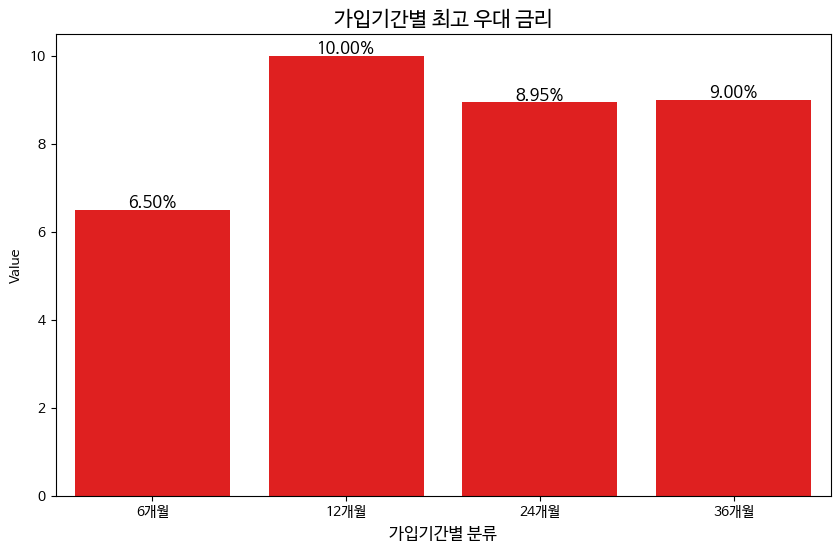

In [13]:
# % 형식을 float형식으로 변경시켜주기
#df_concat['세전이자율(%)'] = df_concat['세전이자율'].apply(lambda x : float(x[:-1] if "-" not in x else np.nan))
df_concat['세전이자율(%)'] = df_concat['세전이자율'].astype(str).apply(lambda x: float(x[:-1]) if "-" not in x else np.nan)
df_concat['세후이자율(%)'] = df_concat['세후이자율'].apply(lambda x : float(x[:-1] if "-" not in x else np.nan))
df_concat['최고우대금리(%)'] = df_concat['최고우대금리'].apply(lambda x : float(x[:-1] if "-" not in x else np.nan))

data = {
    'Category': ['6개월', '12개월', '24개월', '36개월'],
    'Value': [np.nanmax(list(df_concat[df_concat['기간'] =='6개월']['최고우대금리(%)'])), np.nanmax(list(df_concat[df_concat['기간'] =='12개월']['최고우대금리(%)'])), np.nanmax(list(df_concat[df_concat['기간'] =='24개월']['최고우대금리(%)'])),np.nanmax(list(df_concat[df_concat['기간'] =='36개월']['최고우대금리(%)']))]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Category', y='Value', data=df, color='r', label='Category')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('가입기간별 최고 우대 금리', fontsize = 15)

plt.xlabel('가입기간별 분류', fontsize = 12)

plt.ylabel('Value')

plt.show()

In [14]:
# 최고우대금리를 가지는 상품 확인
highest_rate_products_info = df_concat.groupby('기간')['최고우대금리(%)'].idxmax().apply(
    lambda x: (df_concat.loc[x, '상품명'], df_concat.loc[x, '금융회사'])
)

highest_rate_products_info

기간
12개월         (웰뱅 워킹 적금, 웰컴저축은행)
24개월          (너만Solo 적금, 부산은행)
36개월          (너만Solo 적금, 부산은행)
6개월     (NH1934월복리적금, 농협은행주식회사)
Name: 최고우대금리(%), dtype: object

## [2-2] 기간 별 평균 최고 기본 금리

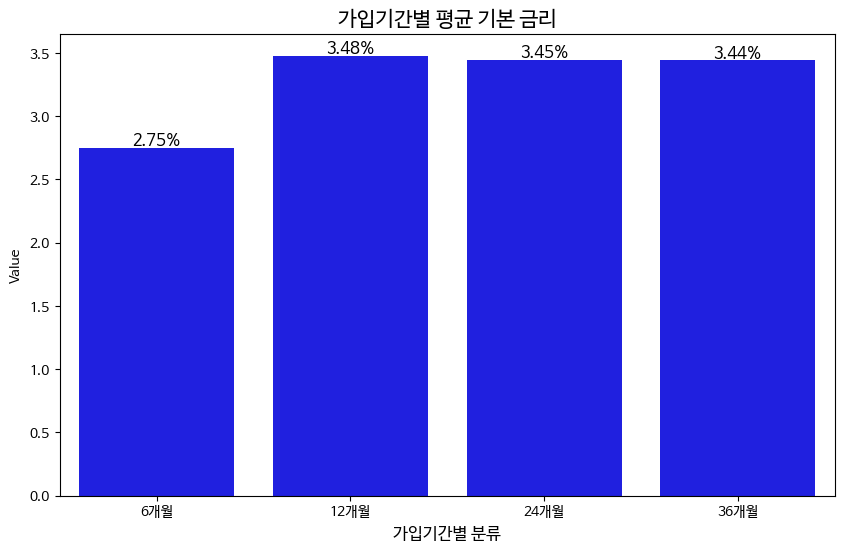

In [15]:
data = {
    'Category': ['6개월', '12개월', '24개월', '36개월'],
    'Value': [find_basic_rate(dp6_df), find_basic_rate(dp12_df), find_basic_rate(dp24_df), find_basic_rate(dp36_df)]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Category', y='Value', data=df, color='b', label='Category')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('가입기간별 평균 기본 금리', fontsize = 15)

plt.xlabel('가입기간별 분류', fontsize = 12)

plt.ylabel('Value')

plt.show()

★ 전체 평균으로 확인한 결과, 우대금리와 기본금리의 차이가 크지 않았음.

## [+] 자유적립, 정액적립 수

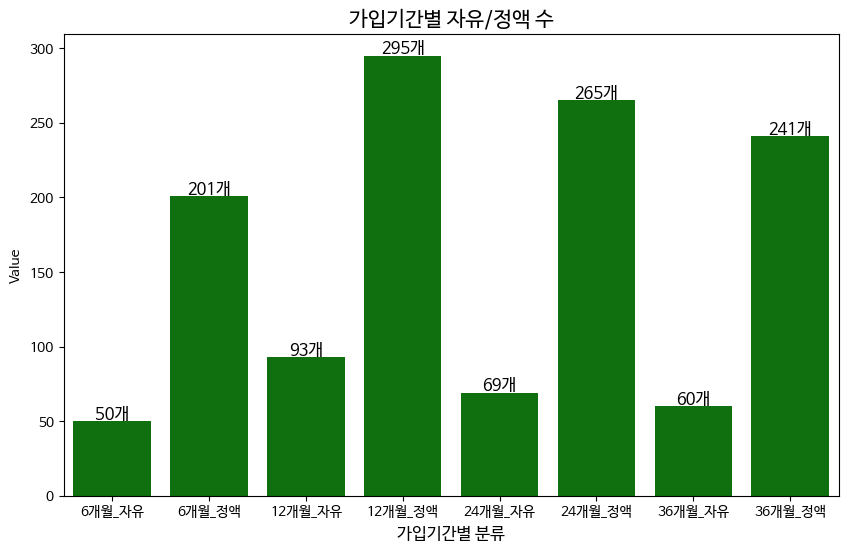

In [16]:
data = {
    'Category': ['6개월_자유','6개월_정액',  '12개월_자유','12개월_정액','24개월_자유','24개월_정액','36개월_자유','36개월_정액',],
    'Value': [len(df_concat[(df_concat['기간'] == "6개월") & (df_concat['적립방식'] == '자유적립식')]) , len(df_concat[(df_concat['기간'] == "6개월") & (df_concat['적립방식'] == '정액적립식')]),
              len(df_concat[(df_concat['기간'] == "12개월") & (df_concat['적립방식'] == '자유적립식')]) , len(df_concat[(df_concat['기간'] == "12개월") & (df_concat['적립방식'] == '정액적립식')]),
              len(df_concat[(df_concat['기간'] == "24개월") & (df_concat['적립방식'] == '자유적립식')]) , len(df_concat[(df_concat['기간'] == "24개월") & (df_concat['적립방식'] == '정액적립식')]),
              len(df_concat[(df_concat['기간'] == "36개월") & (df_concat['적립방식'] == '자유적립식')]) , len(df_concat[(df_concat['기간'] == "36개월") & (df_concat['적립방식'] == '정액적립식')]),]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Category', y='Value', data=df, color='g', label='Category')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('가입기간별 자유/정액 수', fontsize = 15)

plt.xlabel('가입기간별 분류', fontsize = 12)

plt.ylabel('Value')

plt.show()

# [3] 평균 최고금리 상위 은행, 최고 금리 하위 은행

In [17]:
dp6_df['최고이자율_수치'] = dp6_df['최고우대금리'].str.rstrip('%').astype(float)
dp12_df['최고이자율_수치'] = pd.to_numeric(dp12_df['최고우대금리'].str.rstrip('%'), errors='coerce')
#dp12_df['최고이자율_수치'] = dp12_df['최고우대금리'].str.rstrip('%').astype(float)
dp24_df['최고이자율_수치'] = pd.to_numeric(dp24_df['최고우대금리'].str.rstrip('%'), errors='coerce')
dp36_df['최고이자율_수치'] = pd.to_numeric(dp36_df['최고우대금리'].str.rstrip('%'), errors='coerce')
#dp24_df['최고이자율_수치'] = dp24_df['최고우대금리'].str.rstrip('%').astype(float)
#dp36_df['최고이자율_수치'] = dp36_df['최고우대금리'].str.rstrip('%').astype(float)

In [18]:
tmp_3_6 = dp6_df.groupby(['금융회사']).mean()['최고이자율_수치'].reset_index()
tmp_3_6.rename(columns = {'최고이자율_수치' : '최고이자율_수치_6'}, inplace = True)

tmp_3_12 = dp12_df.groupby(['금융회사']).mean()['최고이자율_수치'].reset_index()
tmp_3_12.rename(columns = {'최고이자율_수치' : '최고이자율_수치_12'}, inplace = True)

tmp_3_24 = dp24_df.groupby(['금융회사']).mean()['최고이자율_수치'].reset_index()
tmp_3_24.rename(columns = {'최고이자율_수치' : '최고이자율_수치_24'}, inplace = True)

tmp_3_36 = dp36_df.groupby(['금융회사']).mean()['최고이자율_수치'].reset_index()
tmp_3_36.rename(columns = {'최고이자율_수치' : '최고이자율_수치_36'}, inplace = True)

tmp_3 = tmp_3_6.merge(tmp_3_12, how = 'left', on = '금융회사').merge(tmp_3_24, how = 'left', on = '금융회사').merge(tmp_3_36, how = 'left', on = '금융회사')
tmp_3 = tmp_3.fillna(0)
tmp_3['평균최고우대금리'] = round((tmp_3['최고이자율_수치_6'] + tmp_3['최고이자율_수치_12'] + tmp_3['최고이자율_수치_24'] + tmp_3['최고이자율_수치_36']) / 4, 3)
tmp_3_high = tmp_3.sort_values(by = '평균최고우대금리', ascending = False).head(10)
tmp_3_low = tmp_3.sort_values(by = '평균최고우대금리', ascending = False).tail(10)

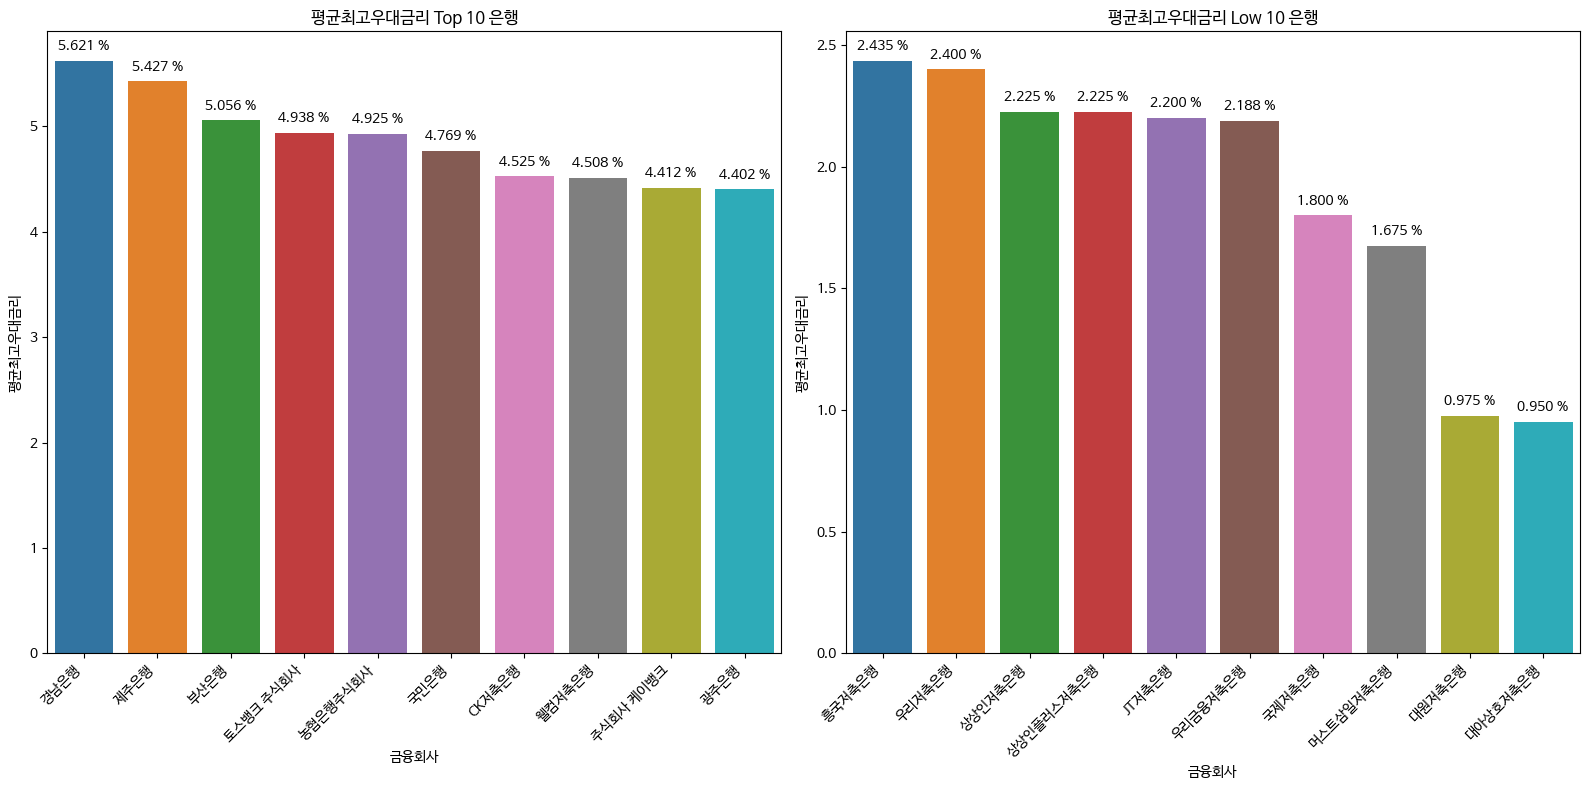

In [19]:
plt.figure(figsize=(16, 8))

# High
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='금융회사', y='평균최고우대금리', data=tmp_3_high)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f} %', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('평균최고우대금리')
plt.title('평균최고우대금리 Top 10 은행')

plt.xticks(rotation=45, ha='right')

# Low
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='금융회사', y='평균최고우대금리', data=tmp_3_low)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.3f} %', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('평균최고우대금리')
plt.title('평균최고우대금리 Low 10 은행')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

# [4] 기본 금리 상위 은행, 기본 금리 하위 은행

In [20]:
tmp_4_6 = dp6_df.groupby(['금융회사']).mean()['세전이자율'].reset_index()
tmp_4_6.rename(columns = {'세전이자율' : '세전이자율_6'}, inplace = True)

tmp_4_12 = dp12_df.groupby(['금융회사']).mean()['세전이자율'].reset_index()
tmp_4_12.rename(columns = {'세전이자율' : '세전이자율_12'}, inplace = True)

tmp_4_24 = dp24_df.groupby(['금융회사']).mean()['세전이자율'].reset_index()
tmp_4_24.rename(columns = {'세전이자율' : '세전이자율_24'}, inplace = True)

tmp_4_36 = dp36_df.groupby(['금융회사']).mean()['세전이자율'].reset_index()
tmp_4_36.rename(columns = {'세전이자율' : '세전이자율_36'}, inplace = True)

In [21]:
tmp_4 = tmp_4_6.merge(tmp_4_12, how = 'left', on = '금융회사').merge(tmp_4_24, how = 'left', on = '금융회사').merge(tmp_4_36, how = 'left', on = '금융회사')
tmp_4 = tmp_4.fillna(0)
tmp_4['평균기본이자율'] = round((tmp_4['세전이자율_6'] + tmp_4['세전이자율_12'] + tmp_4['세전이자율_24'] + tmp_4['세전이자율_36']) / 4, 3)
tmp_4_high = tmp_4.sort_values(by = '평균기본이자율', ascending = False).head(10)
tmp_4_low = tmp_4.sort_values(by = '평균기본이자율', ascending = False).tail(10)

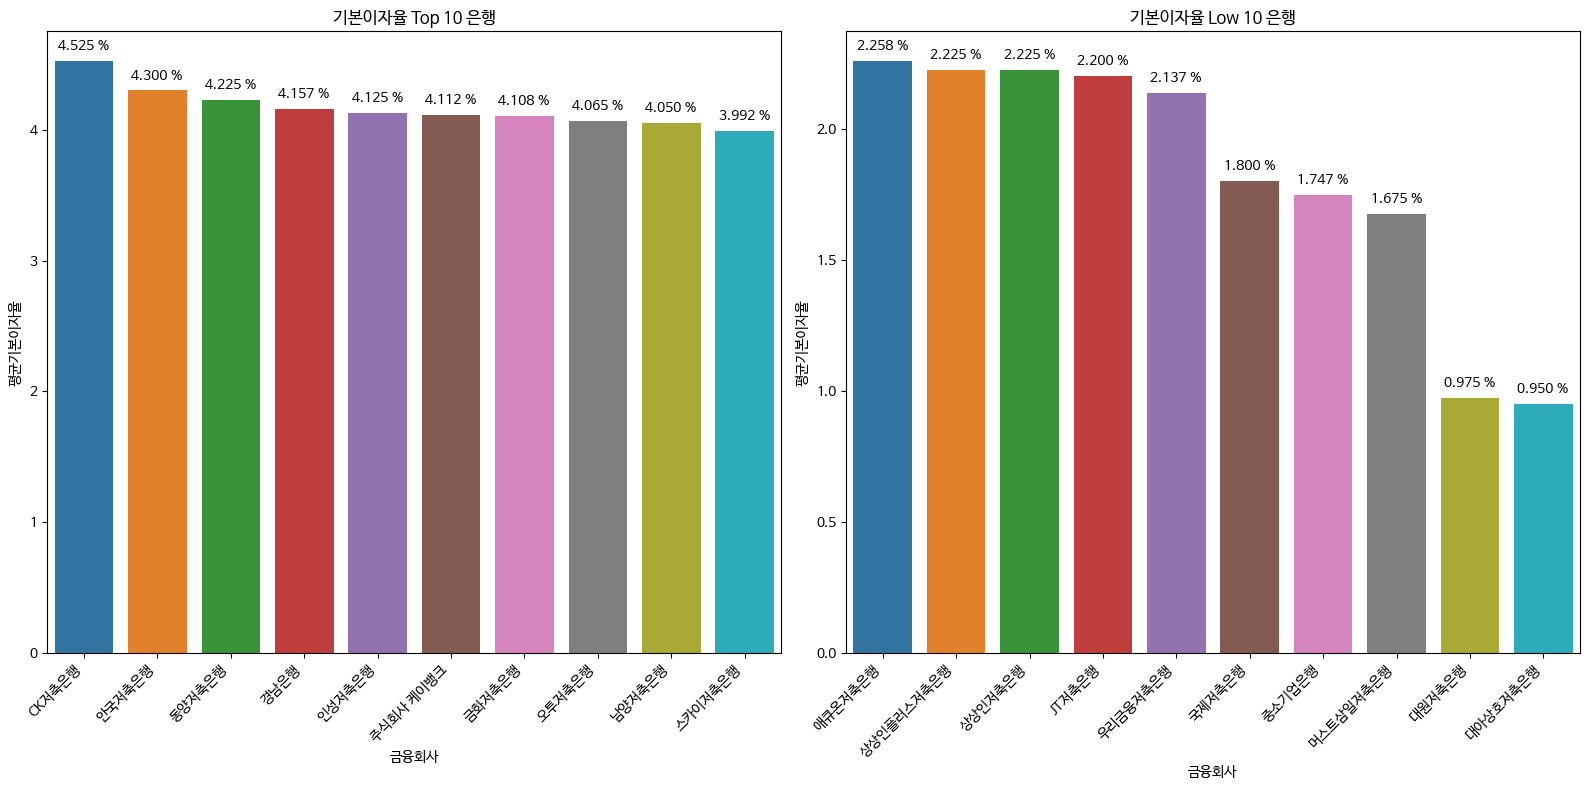

In [22]:
plt.figure(figsize=(16, 8))

# High
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='금융회사', y='평균기본이자율', data=tmp_4_high)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f} %', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('평균기본이자율')
plt.title('기본이자율 Top 10 은행')

plt.xticks(rotation=45, ha='right')

# Low
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='금융회사', y='평균기본이자율', data=tmp_4_low)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.3f} %', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('평균기본이자율')
plt.title('기본이자율 Low 10 은행')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

# [5] 저축 은행과 은행에 따라 적금 상품 구성의 차이

In [23]:
bank_list = list(set(list(dp6_df['금융회사'].unique()) + list(dp12_df['금융회사'].unique()) + list(dp24_df['금융회사'].unique()) + list(dp36_df['금융회사'].unique())))

In [24]:
# 저축은행(jb)와 일반은행(gb)로 분할한다.
jb = []
gb = []
ob = ['주식회사 카카오뱅크',  '토스뱅크 주식회사', '주식회사 케이뱅크']

for bank in bank_list:
    if '저축' in bank:
        jb.append(bank)
    else:
        gb.append(bank)

gb_not_ob = [bank for bank in gb if bank not in ob]

# 결과 출력
print("저축은행 리스트:", jb)
print("일반은행 리스트:", gb)
print("온라인은행 리스트:", ob)
print("온라인은행 제외 일반은행:", gb_not_ob)

저축은행 리스트: ['KB저축은행', 'MS저축은행', '스타저축은행', '라온저축은행', '우리저축은행', '더블저축은행', '조은저축은행', '모아저축은행', '엔에이치저축은행', 'OK저축은행', 'BNK저축은행', '신한저축은행', '디비저축은행', '부림저축은행', '에스앤티저축은행', '조흥저축은행', '세람저축은행', 'DH저축은행', '흥국저축은행', '하나저축은행', '웰컴저축은행', '오성저축은행', '센트럴저축은행', '아산저축은행', '삼호저축은행', '한국투자저축은행', '유니온저축은행', '오투저축은행', '스마트저축은행', '대아상호저축은행', '상상인플러스저축은행', '우리금융저축은행', '대원저축은행', '인성저축은행', '융창저축은행', '대명상호저축은행', '금화저축은행', 'CK저축은행', '인천저축은행', '청주저축은행', '바로저축은행', '대백저축은행', '한성저축은행', 'SBI저축은행', 'JT친애저축은행', '스카이저축은행', '평택상호저축은행', 'IBK저축은행', '키움예스저축은행', 'OSB저축은행', '드림저축은행', '한화저축은행', '고려저축은행', 'JT저축은행', '푸른저축은행', '페퍼저축은행', '참저축은행', 'HB저축은행', '동원제일저축은행', '상상인저축은행', '다올저축은행', '솔브레인저축은행', '동양저축은행', '국제저축은행', '유안타저축은행', '키움저축은행', '삼정저축은행', '애큐온저축은행', '진주저축은행', '더케이저축은행', '대한저축은행', '머스트삼일저축은행', '예가람저축은행', '대신저축은행', '영진저축은행', '안국저축은행', '남양저축은행', '안양저축은행', '민국저축은행']
일반은행 리스트: ['하나은행', '부산은행', '광주은행', '우리은행', '중소기업은행', '한국산업은행', '전북은행', '수협은행', '국민은행', '신한은행', '제주은행', '주식회사 카카오뱅크', '경남은행', '대구은행', '농협은행주식회사', '토스뱅크 주식회사', 

In [25]:
def find_bank_type(df) :
    return df['금융회사'].apply(lambda x: '저축은행' if x in jb else ('온라인은행' if x in ob else ('일반은행' if x in gb_not_ob else None)))

In [26]:
dp6_df['금융회사_종류'] =  find_bank_type(dp6_df)
dp12_df['금융회사_종류'] =  find_bank_type(dp12_df)
dp24_df['금융회사_종류'] =  find_bank_type(dp24_df)
dp36_df['금융회사_종류'] =  find_bank_type(dp36_df)

In [27]:
tmp_data = {
    '금융회사_종류': ['온라인은행', '일반은행', '저축은행'],
    '금융사count': [len(ob), len(gb_not_ob), len(jb)]
}

tmp_df = pd.DataFrame(tmp_data)

In [28]:
tmp6 = tmp_df.merge(dp6_df.groupby(['금융회사_종류']).count()['금융회사'].reset_index(), how = 'left', on = '금융회사_종류')
tmp12 = tmp_df.merge(dp12_df.groupby(['금융회사_종류']).count()['금융회사'].reset_index(), how = 'left', on = '금융회사_종류')
tmp24 = tmp_df.merge(dp24_df.groupby(['금융회사_종류']).count()['금융회사'].reset_index(), how = 'left', on = '금융회사_종류')
tmp36 = tmp_df.merge(dp36_df.groupby(['금융회사_종류']).count()['금융회사'].reset_index(), how = 'left', on = '금융회사_종류')

In [29]:
tmp6['상품수/금융사count'] = tmp6['금융회사'] / tmp6['금융사count']
tmp12['상품수/금융사count'] = tmp12['금융회사'] / tmp12['금융사count']
tmp24['상품수/금융사count'] = tmp24['금융회사'] / tmp24['금융사count']
tmp36['상품수/금융사count'] = tmp36['금융회사'] / tmp36['금융사count']

In [30]:
tmp6

,금융회사_종류,금융사count,금융회사,상품수/금융사count
0,온라인은행,3,7,2.333333
1,일반은행,15,26,1.733333
2,저축은행,79,218,2.759494


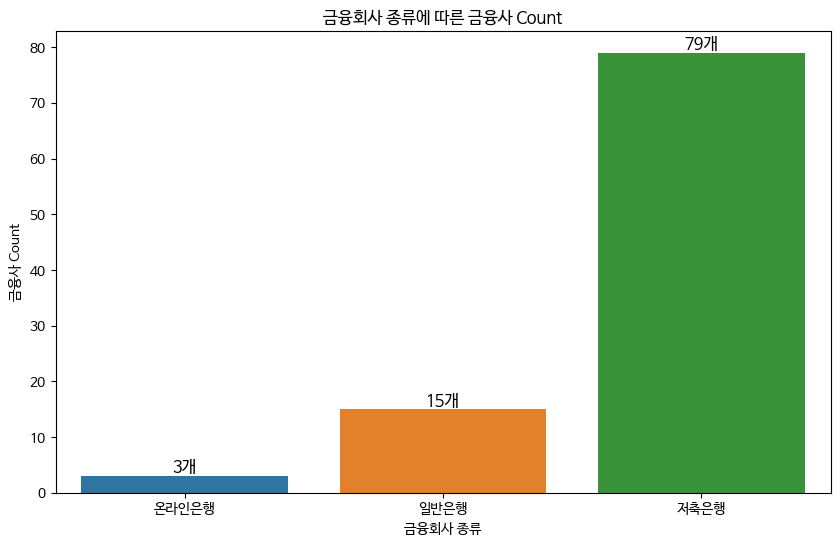

In [31]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정 (선택 사항)

# barplot 그리기
ax = sns.barplot(x='금융회사_종류', y='금융사count', data=tmp6)

# annotation 추가
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.title('금융회사 종류에 따른 금융사 Count')
plt.xlabel('금융회사 종류')
plt.ylabel('금융사 Count')

plt.show()

## [5-1] 금융사 형태별 평균 판매중인 적금 상품 갯수

In [39]:
dp36_df.groupby(['금융회사_종류']).mean()['세전이자율']

금융회사_종류
온라인은행    3.925000
일반은행     3.488056
저축은행     3.427586
Name: 세전이자율, dtype: float64

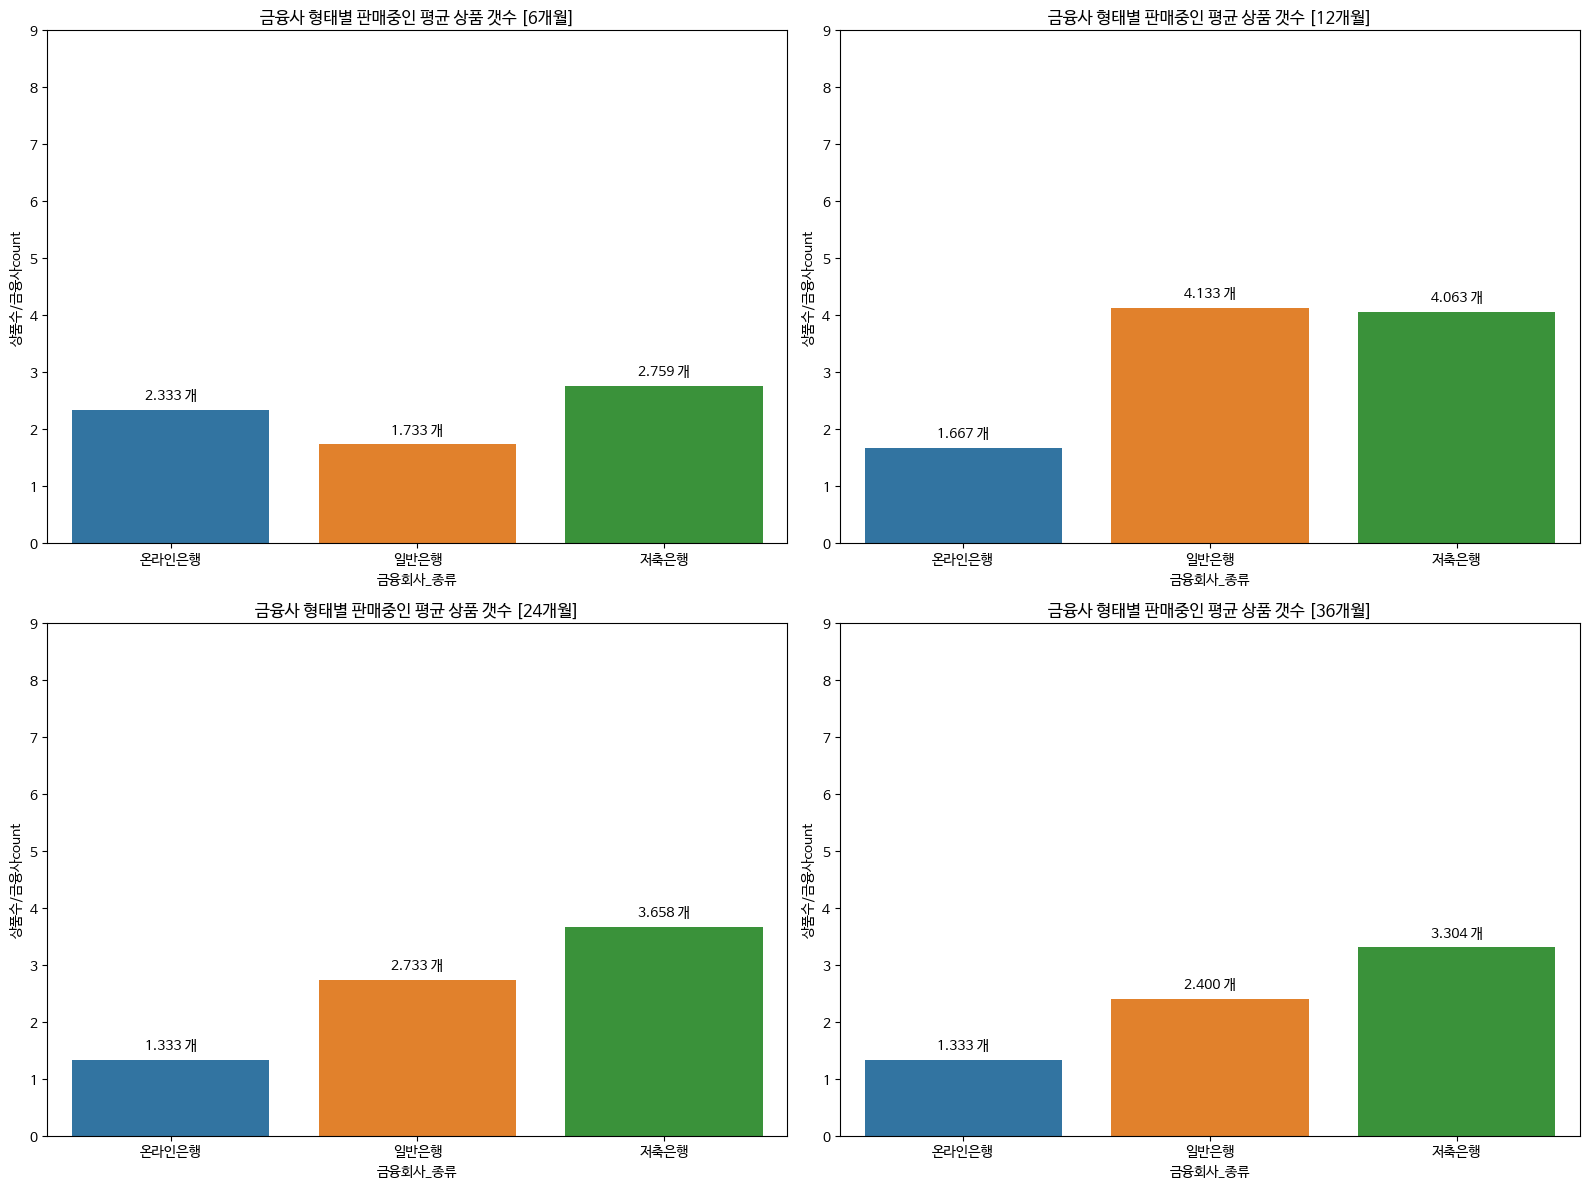

In [ ]:
plt.figure(figsize=(16, 12))

# 6
plt.subplot(2, 2, 1)
ax1 = sns.barplot(x='금융회사_종류', y='상품수/금융사count', data=tmp6)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품수/금융사count')
plt.title('금융사 형태별 판매중인 평균 상품 갯수 [6개월]')
plt.ylim(0, 9)

# 12
plt.subplot(2, 2, 2)
ax2 = sns.barplot(x='금융회사_종류', y='상품수/금융사count', data=tmp12)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.3f} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품수/금융사count')
plt.title('금융사 형태별 판매중인 평균 상품 갯수 [12개월]')
plt.ylim(0, 9)

# 24
plt.subplot(2, 2, 3)
ax3 = sns.barplot(x='금융회사_종류', y='상품수/금융사count', data=tmp24)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.3f} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품수/금융사count')
plt.title('금융사 형태별 판매중인 평균 상품 갯수 [24개월]')
plt.ylim(0, 9)

# 36
plt.subplot(2, 2, 4)
ax4 = sns.barplot(x='금융회사_종류', y='상품수/금융사count', data=tmp36)
for p in ax4.patches:
    ax4.annotate(f'{p.get_height():.3f} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품수/금융사count')
plt.title('금융사 형태별 판매중인 평균 상품 갯수 [36개월]')
plt.ylim(0, 9)

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 보여주기
plt.show()

- 저축은행의 상품 갯수가 많지만, 예금처럼 큰 차이는 아니다.
- 역시 12개월 상품이 가장 많았다.
- 온라인 은행은 '단기 상품' 에 집중하고 있는 모습을 확인할 수 있다.

## [5-2] 회사별 판매중인 상품 갯수

In [ ]:
high_6 = dp6_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).head(10)
low_6 = dp6_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).tail(10)

### - 6개월 상품 대상

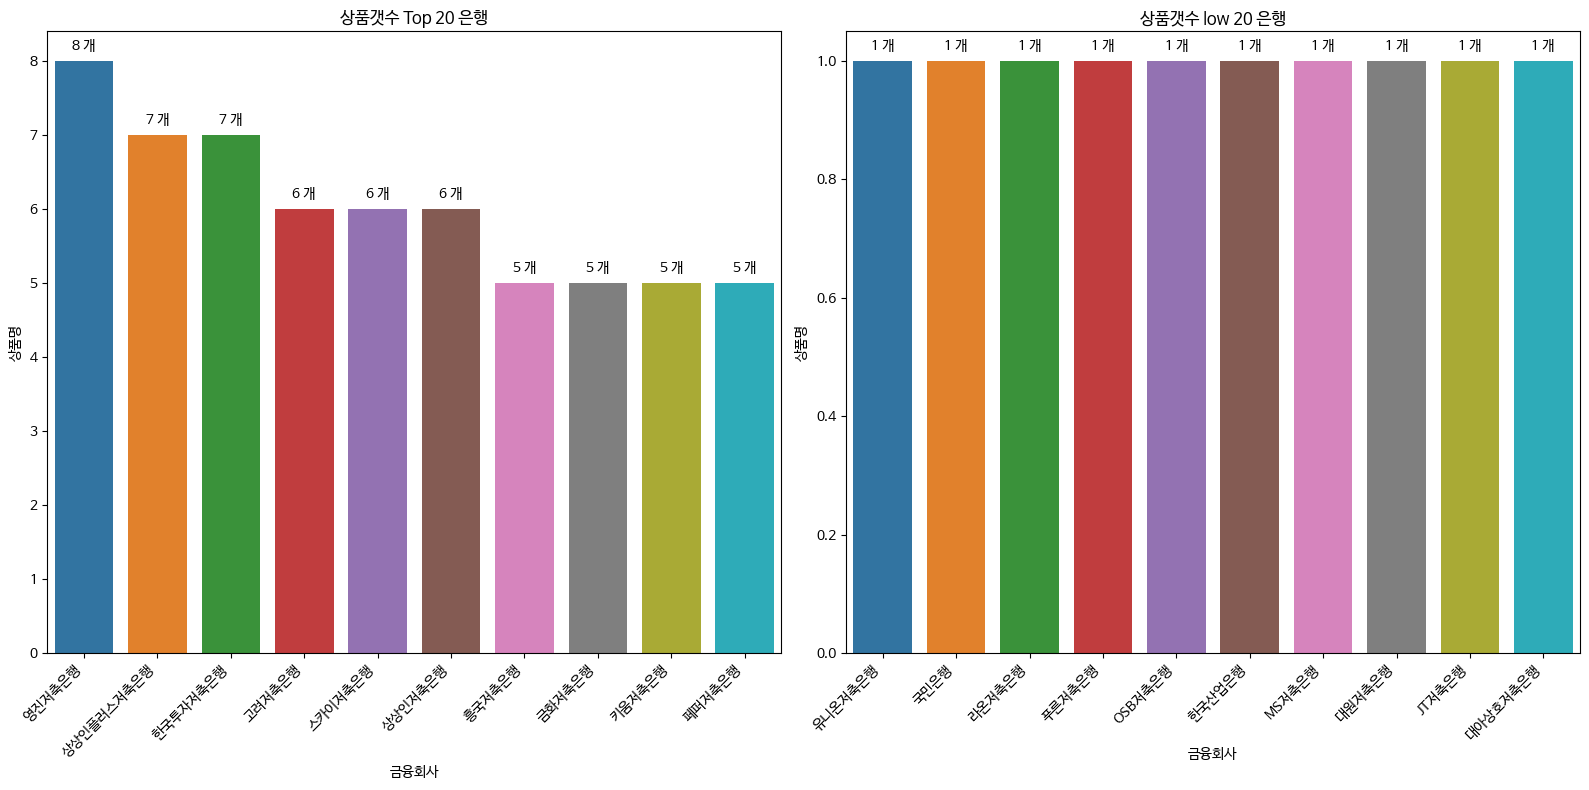

In [ ]:
plt.figure(figsize=(16, 8))

# 6
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='금융회사', y='상품명', data=high_6)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 Top 20 은행')

plt.xticks(rotation=45, ha='right')

# 12
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='금융회사', y='상품명', data=low_6)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 low 20 은행')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

### - 12개월 상품

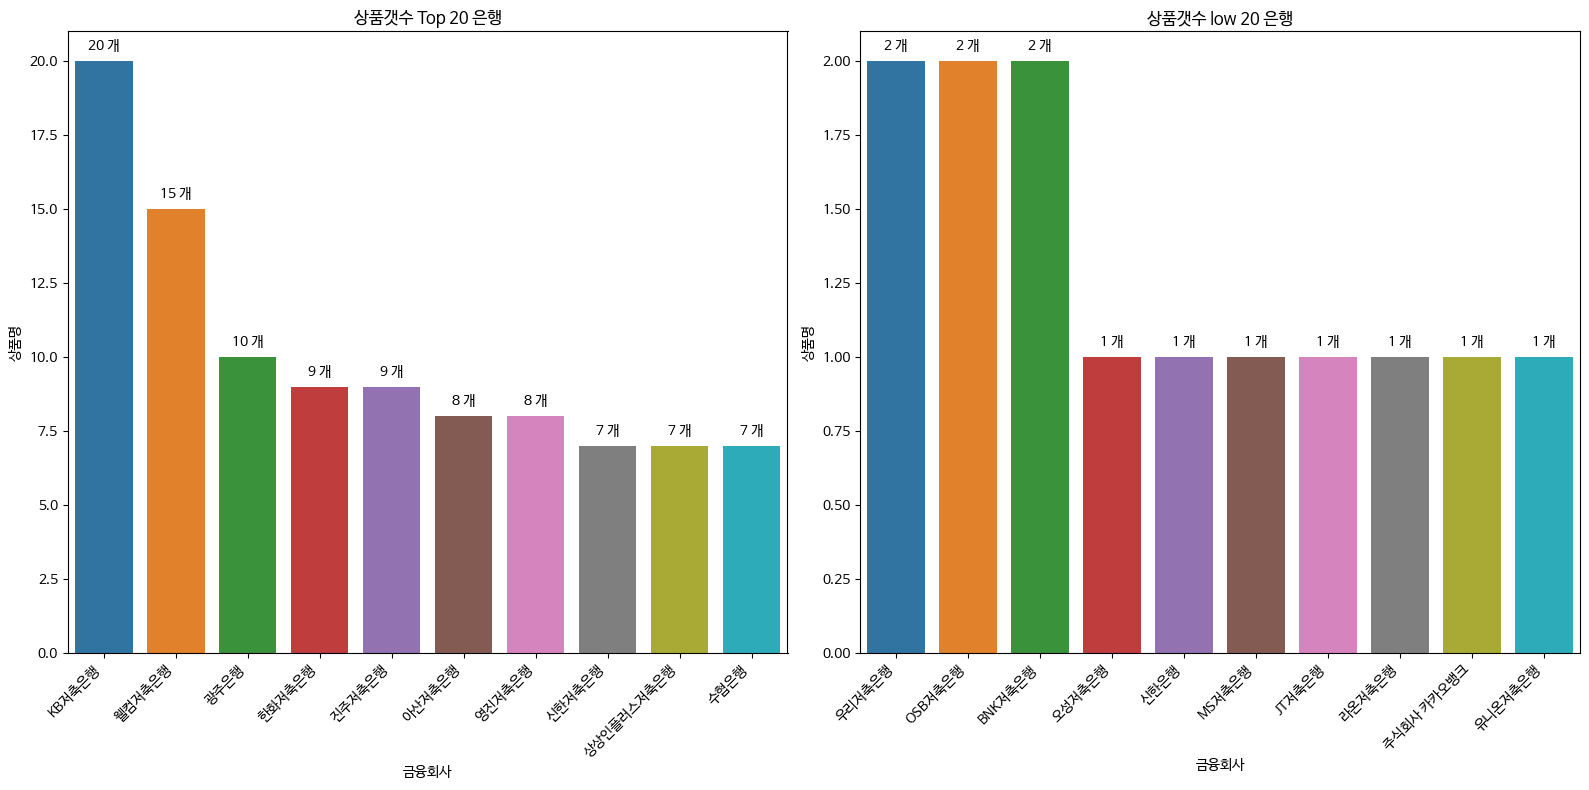

In [ ]:
high_12 = dp12_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).head(10)
low_12 = dp12_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).tail(10)

plt.figure(figsize=(16, 8))

# 12
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='금융회사', y='상품명', data=high_12)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 Top 20 은행')

plt.xticks(rotation=45, ha='right')

# 12
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='금융회사', y='상품명', data=low_12)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 low 20 은행')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

### - 24개월 상품

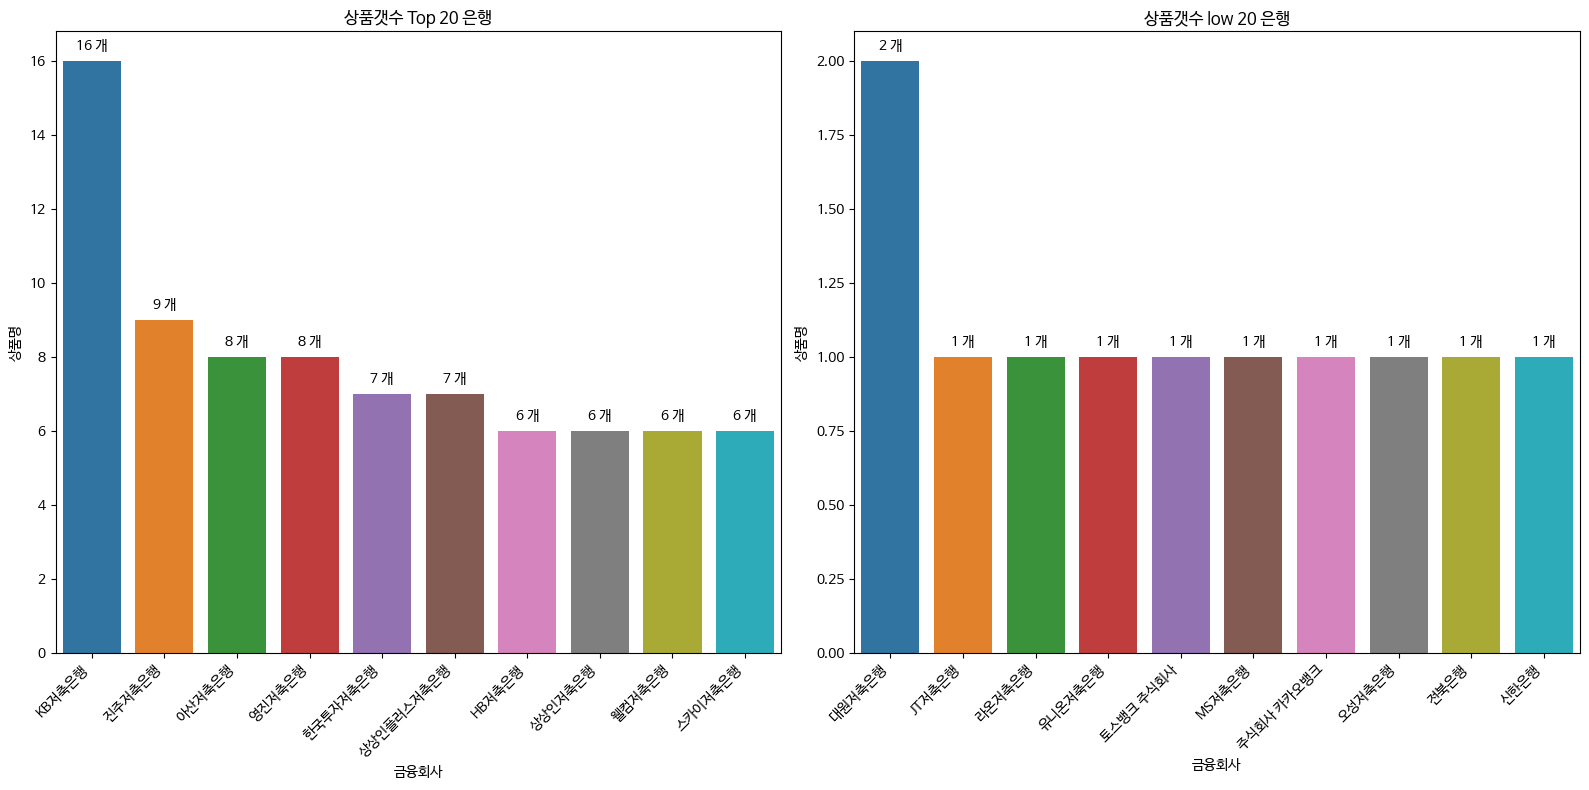

In [ ]:
high_24 = dp24_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).head(10)
low_24 = dp24_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).tail(10)

plt.figure(figsize=(16, 8))

# 24
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='금융회사', y='상품명', data=high_24)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 Top 20 은행')

plt.xticks(rotation=45, ha='right')

# 24
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='금융회사', y='상품명', data=low_24)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 low 20 은행')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

### - 36개월 상품

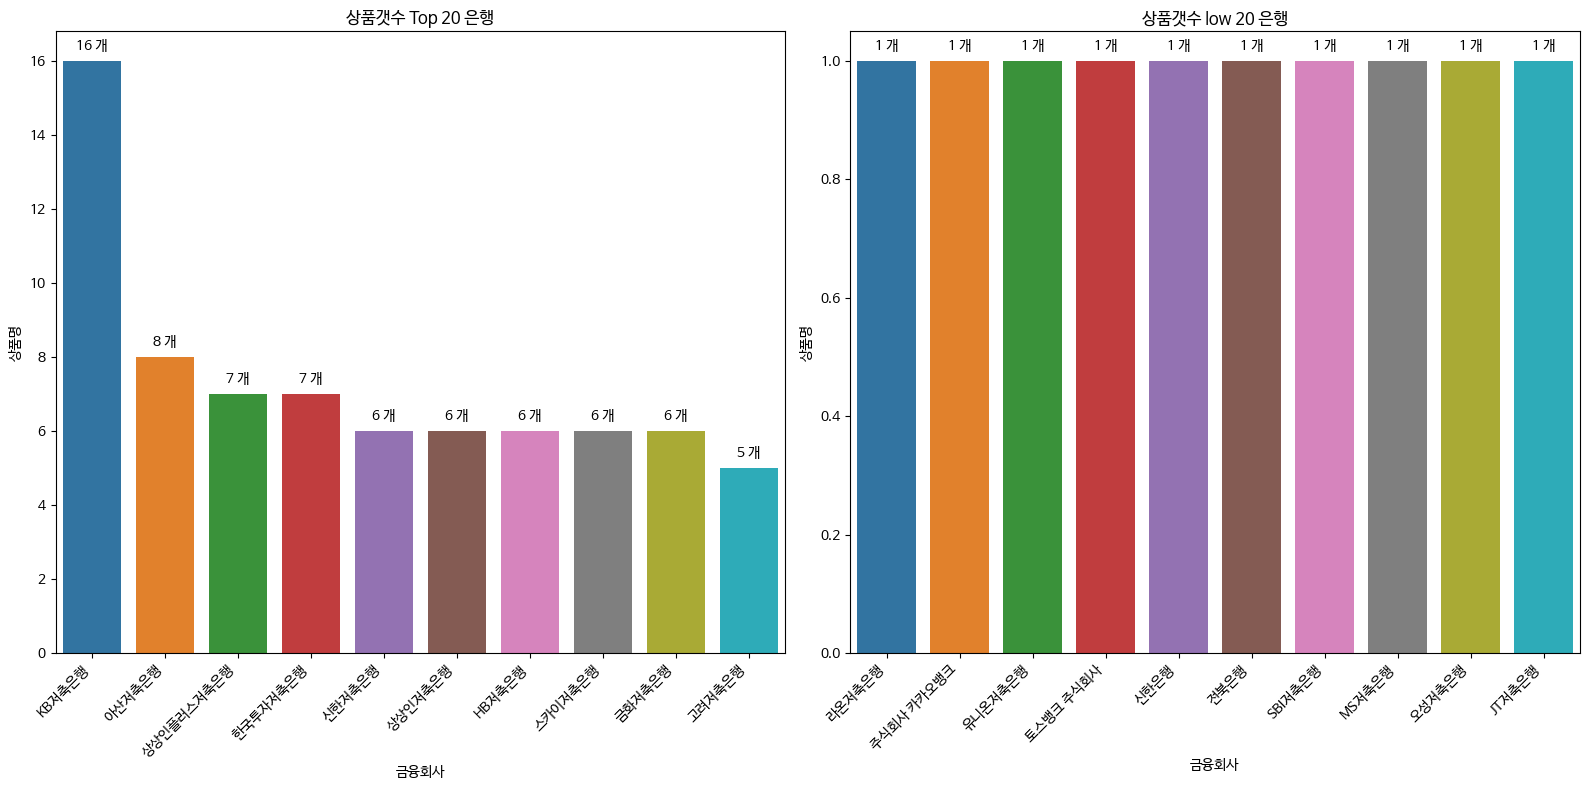

In [ ]:
high_36 = dp36_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).head(10)
low_36 = dp36_df.groupby(['금융회사']).count()['상품명'].reset_index().sort_values(by = '상품명', ascending = False).tail(10)

plt.figure(figsize=(16, 8))

# 36
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='금융회사', y='상품명', data=high_36)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 Top 20 은행')

plt.xticks(rotation=45, ha='right')

# 36
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='금융회사', y='상품명', data=low_36)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())} 개', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel('상품명')
plt.title('상품갯수 low 20 은행')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()